In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mrl-dataset/train/Open_Eyes/s0014_08315_0_0_1_1_0_02.png
/kaggle/input/mrl-dataset/train/Open_Eyes/s0036_03092_1_0_1_0_0_01.png
/kaggle/input/mrl-dataset/train/Open_Eyes/s0014_07653_0_0_1_1_1_02.png
/kaggle/input/mrl-dataset/train/Open_Eyes/s0019_06130_0_0_1_0_0_01.png
/kaggle/input/mrl-dataset/train/Open_Eyes/s0001_02878_0_1_1_0_1_01.png
/kaggle/input/mrl-dataset/train/Open_Eyes/s0012_08642_0_0_1_1_0_02.png
/kaggle/input/mrl-dataset/train/Open_Eyes/s0014_08319_0_0_1_1_0_02.png
/kaggle/input/mrl-dataset/train/Open_Eyes/s0012_07611_0_1_1_2_0_01.png
/kaggle/input/mrl-dataset/train/Open_Eyes/s0012_04571_0_0_1_0_1_03.png
/kaggle/input/mrl-dataset/train/Open_Eyes/s0019_06033_0_0_1_0_0_01.png
/kaggle/input/mrl-dataset/train/Open_Eyes/s0014_07463_0_0_1_2_1_02.png
/kaggle/input/mrl-dataset/train/Open_Eyes/s0019_06024_0_0_1_0_0_01.png
/kaggle/input/mrl-dataset/train/Open_Eyes/s0012_08659_0_0_1_1_0_02.png
/kaggle/input/mrl-dataset/train/Open_Eyes/s0012_07912_0_0_1_1_0_02.png
/kaggl

In [3]:
!pip install keras_flops

100%|██████████| 2000/2000 [00:02<00:00, 724.54it/s]


Original size: 2400, Augmented size: 7200, Total size: 9600, Increase factor: 4.00
FLOPs before training: FLOPs calculation profiling initiated (details in logdir)
300/300 ━━━━━━━━━━━━━━━━━━━━ 25s 82ms/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step
Epoch 1/40


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


933/960 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5466 - loss: 0.7162
Epoch 1: val_loss improved from inf to 0.72236, saving model to bestClassifier.keras
960/960 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5478 - loss: 0.7148 - val_accuracy: 0.5380 - val_loss: 0.7224
Epoch 2/40
945/960 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6438 - loss: 0.5888
Epoch 2: val_loss improved from 0.72236 to 0.71929, saving model to bestClassifier.keras
960/960 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6439 - loss: 0.5887 - val_accuracy: 0.5411 - val_loss: 0.7193
Epoch 3/40
931/960 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6610 - loss: 0.5668
Epoch 3: val_loss did not improve from 0.71929
960/960 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6610 - loss: 0.5667 - val_accuracy: 0.4776 - val_loss: 0.7199
Epoch 4/40
936/960 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6626 - loss: 0.5579
Epoch 4: val_loss improved from 0.71929 to 0.71504, saving model to bestClassifier.keras
960/96

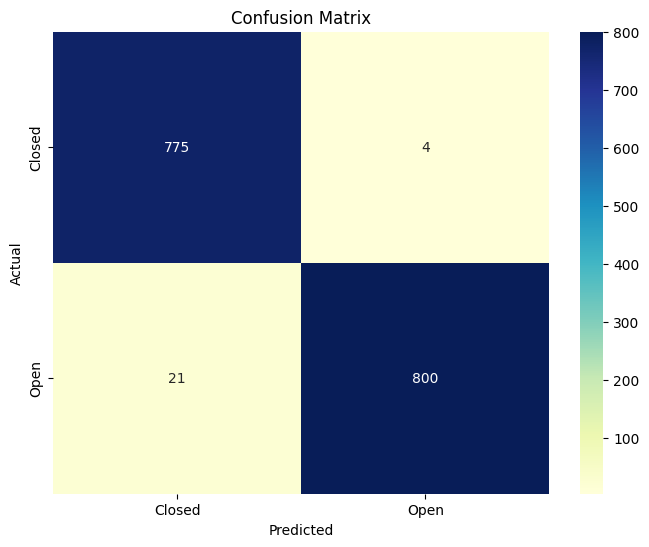

Precision: 0.9950
Recall: 0.9744
F1 Score: 0.9846
Accuracy: 0.9844


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from glob import glob
from PIL import Image
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Conv2D, BatchNormalization, MaxPooling2D, Dropout, Flatten
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import os

# Aggressive Data Augmentation
augmentor = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    brightness_range=[0.5, 1.5],
    fill_mode='nearest'
)

# Data Preparation
X, Y = [], []

# Load Open Eyes images
for i in tqdm(glob('/kaggle/input/mrl-dataset/train/Open_Eyes/*')):
    temp = np.array(Image.open(i).resize((64, 64)))
    X.append(temp)
    Y.append(1)

# Load Closed Eyes images
for i in tqdm(glob('/kaggle/input/mrl-dataset/train/Closed_Eyes/*')):
    temp = np.array(Image.open(i).resize((64, 64)))
    X.append(temp)
    Y.append(0)

X = np.array(X) / 255.0  # Normalize pixel values
Y = np.array(Y)
X = np.expand_dims(X, -1)  # Add channel dimension

# Train-Test Split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=42)

# Create directories for augmented dataset
augmented_train_dir = '/kaggle/working/augmented_train'
os.makedirs(augmented_train_dir, exist_ok=True)

# Initialize lists to store augmented training data
full_x_train = list(x_train)  # Start with original training images
full_y_train = list(y_train)  # Start with original training labels

# Augment and save images
augmented_images = []  # Store augmented images
for i, img in enumerate(x_train):
    for j in range(3):  # Generate multiple augmentations per image
        img_aug = augmentor.random_transform(img)
        augmented_images.append(img_aug)
        full_x_train.append(img_aug)
        full_y_train.append(y_train[i])
        
        # Ensure the image is in the correct format (0-255 and uint8)
        img_aug_uint8 = (img_aug * 255).astype(np.uint8)
        
        # Convert to PIL image
        img_pil = Image.fromarray(img_aug_uint8.squeeze(), mode='L')  # 'L' mode for grayscale images
        
        # Create directory for the label if it doesn't exist
        label = 'Open_Eyes' if y_train[i] == 1 else 'Closed_Eyes'
        label_dir = os.path.join(augmented_train_dir, label)
        os.makedirs(label_dir, exist_ok=True)
        
        # Save the image
        img_pil.save(os.path.join(label_dir, f'augmented_{i}_{j}.png'))

# Convert full dataset to numpy arrays
full_x_train = np.array(full_x_train)  # Now this should work
full_y_train = np.array(full_y_train)

# Display dataset size before and after augmentation
original_size = len(x_train)
augmented_size = len(augmented_images)
total_size = len(full_x_train)
increase_factor = total_size / original_size
print(f'Original size: {original_size}, Augmented size: {augmented_size}, Total size: {total_size}, Increase factor: {increase_factor:.2f}')

# Feature Extractor Model Definition
feature_extractor = Sequential([
    Input(shape=(64, 64, 1)),
    
    Conv2D(32, kernel_size=5, strides=1, activation='relu', kernel_regularizer=l2(0.001)),
    Conv2D(32, kernel_size=5, strides=1, activation='relu', kernel_regularizer=l2(0.001), use_bias=False),
    BatchNormalization(),
    MaxPooling2D(strides=2),
    Dropout(0.5),
    
    Conv2D(64, kernel_size=3, strides=1, activation='relu', kernel_regularizer=l2(0.001)),
    Conv2D(64, kernel_size=3, strides=1, activation='relu', kernel_regularizer=l2(0.001), use_bias=False),
    BatchNormalization(),
    MaxPooling2D(strides=2),
    Dropout(0.5),
    
    Flatten()
])

# Function to calculate FLOPs
def calculate_flops(model, input_shape):
    # Create a dummy input tensor of the correct shape
    dummy_input = np.random.random(input_shape).astype(np.float32)

    # Use tf.function to trace the model
    @tf.function
    def compute_flops(input_tensor):
        return model(input_tensor)

    # Make a dummy input tensor
    dummy_input_tensor = tf.convert_to_tensor(dummy_input)
    
    # Trace the model (this will record the computation graph)
    concrete_func = compute_flops.get_concrete_function(dummy_input_tensor)

    # Profile the computation graph to calculate FLOPs
    with tf.profiler.experimental.Profile('logdir'):
        concrete_func(dummy_input_tensor)

    # This method does not return FLOPs directly, but we can calculate it using tf.profiler's logs
    # However, for now, we will just show an example of tracing the function, as FLOPs extraction may require deeper logging analysis.
    # You can use the profiler logs to calculate FLOPs manually if needed.
    return "FLOPs calculation profiling initiated (details in logdir)"

# Calculate FLOPs for the Feature Extractor Model
flops_before_training = calculate_flops(feature_extractor, input_shape=(1, 64, 64, 1))
print(f"FLOPs before training: {flops_before_training}")

# Extract Features from Augmented and Original Images
train_features = feature_extractor.predict(full_x_train)
test_features = feature_extractor.predict(x_test)

# Apply PCA for Dimensionality Reduction
pca = PCA(n_components=17)
x_train_pca = pca.fit_transform(train_features)
x_test_pca = pca.transform(test_features)

# Classification Model with L2 Regularization and More Dropout
classifier = Sequential([
    Dense(64, activation='relu', kernel_regularizer=l2(0.001), input_shape=(x_train_pca.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

classifier.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training with ModelCheckpoint Callback
callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='bestClassifier.keras',
    save_weights_only=False,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    verbose=1
)

classifier.fit(x_train_pca, full_y_train, validation_split=0.2, epochs=40, batch_size=8, callbacks=[callback])

# Evaluation on the Test Set
best_classifier = tf.keras.models.load_model('bestClassifier.keras')
best_classifier.evaluate(x_test_pca, y_test)

# Confusion Matrix
preds = best_classifier.predict(x_test_pca)
preds = (preds >= 0.5).astype(np.int32)

cm = confusion_matrix(y_test, preds)
df_cm = pd.DataFrame(cm, index=['Closed', 'Open'], columns=['Closed', 'Open'])

plt.figure(figsize=(8, 6))
sns.heatmap(df_cm, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Calculate Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, preds)
precision = precision_score(y_test, preds)
recall = recall_score(y_test, preds)
f1 = f1_score(y_test, preds)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Accuracy: {accuracy:.4f}')


100%|██████████| 2000/2000 [00:02<00:00, 872.50it/s]


Original size: 2400, Augmented size: 7200, Total size: 9600, Increase factor: 4.00
FLOPs for Feature Extractor: 233,710,592
300/300 ━━━━━━━━━━━━━━━━━━━━ 25s 82ms/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step
FLOPs for Classifier: 6,336
Total FLOPs (Feature Extractor + Classifier): 233,716,928
Epoch 1/40
943/960 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5599 - loss: 0.7100
Epoch 1: val_loss improved from inf to 0.72475, saving model to bestClassifier.keras
960/960 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5606 - loss: 0.7092 - val_accuracy: 0.4797 - val_loss: 0.7248
Epoch 2/40
949/960 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6532 - loss: 0.5812
Epoch 2: val_loss improved from 0.72475 to 0.71733, saving model to bestClassifier.keras
960/960 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6532 - loss: 0.5812 - val_accuracy: 0.5479 - val_loss: 0.7173
Epoch 3/40
940/960 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6698 - loss: 0.5555
Epoch 3: val_loss improved from 0.71733 t

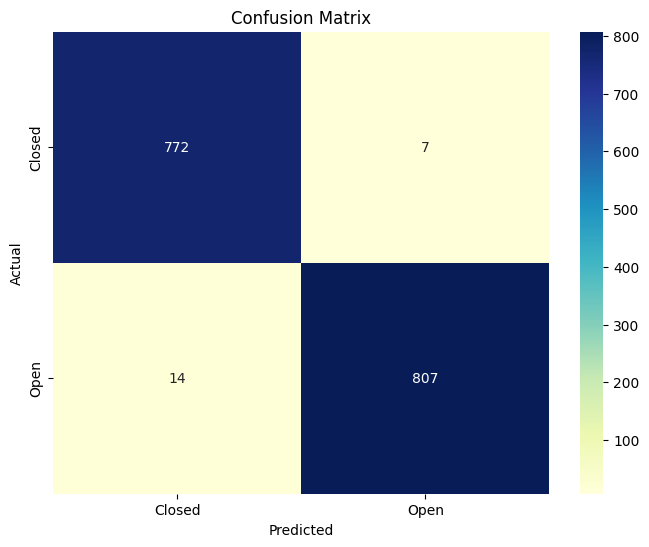

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from glob import glob
from PIL import Image
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Conv2D, BatchNormalization, MaxPooling2D, Dropout, Flatten
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import os

# Function to calculate FLOPs for a model
def calculate_flops(model, input_shape):
    flops = 0
    
    # Handle different input shape formats
    if len(input_shape) == 3:  # For Conv2D models (height, width, channels)
        input_h, input_w, input_c = input_shape
    elif len(input_shape) == 1:  # For Dense models (features,)
        input_shape_flat = input_shape[0]
    else:
        raise ValueError("Unsupported input shape format")
    
    for layer in model.layers:
        if isinstance(layer, Conv2D):
            # Get layer configuration
            filters = layer.filters
            kernel_h, kernel_w = layer.kernel_size
            strides = layer.strides
            padding = layer.padding
            
            # Calculate output dimensions
            if padding == 'same':
                out_h = input_h // strides[0]
                out_w = input_w // strides[1]
            else:  # 'valid' padding
                out_h = (input_h - kernel_h + 1) // strides[0]
                out_w = (input_w - kernel_w + 1) // strides[1]
            
            # FLOPs for Conv2D: 2 * (input_c * kernel_h * kernel_w * filters * out_h * out_w)
            conv_flops = 2 * input_c * kernel_h * kernel_w * filters * out_h * out_w
            flops += conv_flops
            
            # Update input dimensions for next layer
            input_h, input_w, input_c = out_h, out_w, filters
            
        elif isinstance(layer, MaxPooling2D):
            # Update dimensions, no significant FLOPs
            pool_size = layer.pool_size
            strides = layer.strides
            out_h = input_h // strides[0]
            out_w = input_w // strides[1]
            input_h, input_w = out_h, out_w
            
        elif isinstance(layer, Flatten):
            # No FLOPs, just update shape
            input_shape_flat = input_h * input_w * input_c
            
        elif isinstance(layer, Dense):
            # FLOPs for Dense: 2 * (input_units * output_units)
            input_units = input_shape_flat if 'input_shape_flat' in locals() else layer.input_shape[-1]
            output_units = layer.units
            dense_flops = 2 * input_units * output_units
            flops += dense_flops
            input_shape_flat = output_units
            
        # Skip BatchNormalization, Dropout, Input layers (negligible FLOPs)
    
    return flops

# Aggressive Data Augmentation
augmentor = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    brightness_range=[0.5, 1.5],
    fill_mode='nearest'
)

# Data Preparation
X, Y = [], []

# Load Open Eyes images
for i in tqdm(glob('/kaggle/input/mrl-dataset/train/Open_Eyes/*')):
    temp = np.array(Image.open(i).resize((64, 64)))
    X.append(temp)
    Y.append(1)

# Load Closed Eyes images
for i in tqdm(glob('/kaggle/input/mrl-dataset/train/Closed_Eyes/*')):
    temp = np.array(Image.open(i).resize((64, 64)))
    X.append(temp)
    Y.append(0)

X = np.array(X) / 255.0  # Normalize pixel values
Y = np.array(Y)
X = np.expand_dims(X, -1)  # Add channel dimension

# Train-Test Split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=42)

# Create directories for augmented dataset
augmented_train_dir = '/kaggle/working/augmented_train'
os.makedirs(augmented_train_dir, exist_ok=True)

# Save Augmented Images to the New Dataset
augmented_images = []
full_x_train = list(x_train)  # Combine original and augmented images
full_y_train = list(y_train)

for i, img in enumerate(x_train):
    for j in range(3):  # Generate multiple augmentations per image
        img_aug = augmentor.random_transform(img)
        augmented_images.append(img_aug)
        full_x_train.append(img_aug)
        full_y_train.append(y_train[i])
        
        # Ensure the image is in the correct format (0-255 and uint8)
        img_aug_uint8 = (img_aug * 255).astype(np.uint8)
        
        # Convert to PIL image
        img_pil = Image.fromarray(img_aug_uint8.squeeze(), mode='L')  # 'L' mode for grayscale images
        
        # Create directory for the label if it doesn't exist
        label = 'Open_Eyes' if y_train[i] == 1 else 'Closed_Eyes'
        label_dir = os.path.join(augmented_train_dir, label)
        os.makedirs(label_dir, exist_ok=True)
        
        # Save the image
        img_pil.save(os.path.join(label_dir, f'augmented_{i}_{j}.png'))

# Convert full dataset to numpy arrays
full_x_train = np.array(full_x_train)
full_y_train = np.array(full_y_train)

# Display dataset size before and after augmentation
original_size = len(x_train)
augmented_size = len(augmented_images)
total_size = len(full_x_train)
increase_factor = total_size / original_size
print(f'Original size: {original_size}, Augmented size: {augmented_size}, Total size: {total_size}, Increase factor: {increase_factor:.2f}')

# Feature Extractor with L2 Regularization and More Dropout
feature_extractor = Sequential([
    Input(shape=(64, 64, 1)),
    
    Conv2D(32, kernel_size=5, strides=1, activation='relu', kernel_regularizer=l2(0.001)),
    Conv2D(32, kernel_size=5, strides=1, activation='relu', kernel_regularizer=l2(0.001), use_bias=False),
    BatchNormalization(),
    MaxPooling2D(strides=2),
    Dropout(0.5),
    
    Conv2D(64, kernel_size=3, strides=1, activation='relu', kernel_regularizer=l2(0.001)),
    Conv2D(64, kernel_size=3, strides=1, activation='relu', kernel_regularizer=l2(0.001), use_bias=False),
    BatchNormalization(),
    MaxPooling2D(strides=2),
    Dropout(0.5),
    
    Flatten()
])

# Calculate FLOPs for feature_extractor
feature_extractor_flops = calculate_flops(feature_extractor, (64, 64, 1))
print(f'FLOPs for Feature Extractor: {feature_extractor_flops:,}')

# Extract Features from Augmented and Original Images
train_features = feature_extractor.predict(full_x_train)
test_features = feature_extractor.predict(x_test)

# Apply PCA for Dimensionality Reduction
pca = PCA(n_components=17)
x_train_pca = pca.fit_transform(train_features)
x_test_pca = pca.transform(test_features)

# Classification Model with L2 Regularization and More Dropout
classifier = Sequential([
    Input(shape=(17,)),  # Explicitly define input shape
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Calculate FLOPs for classifier
classifier_flops = calculate_flops(classifier, (17,))
print(f'FLOPs for Classifier: {classifier_flops:,}')
print(f'Total FLOPs (Feature Extractor + Classifier): {feature_extractor_flops + classifier_flops:,}')

classifier.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training with ModelCheckpoint Callback
callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='bestClassifier.keras',
    save_weights_only=False,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    verbose=1
)

classifier.fit(x_train_pca, full_y_train, validation_split=0.2, epochs=40, batch_size=8, callbacks=[callback])

# Evaluation on the Test Set
best_classifier = tf.keras.models.load_model('bestClassifier.keras')
best_classifier.evaluate(x_test_pca, y_test)

# Confusion Matrix
preds = best_classifier.predict(x_test_pca)
preds = (preds >= 0.5).astype(np.int32)

cm = confusion_matrix(y_test, preds)
df_cm = pd.DataFrame(cm, index=['Closed', 'Open'], columns=['Closed', 'Open'])

plt.figure(figsize=(8, 6))
sns.heatmap(df_cm, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.savefig('confusion_matrix.png')

# Calculate Metrics
accuracy = accuracy_score(y_test, preds)
precision = precision_score(y_test, preds)
recall = recall_score(y_test, preds)
f1 = f1_score(y_test, preds)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Accuracy: {accuracy:.4f}')

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


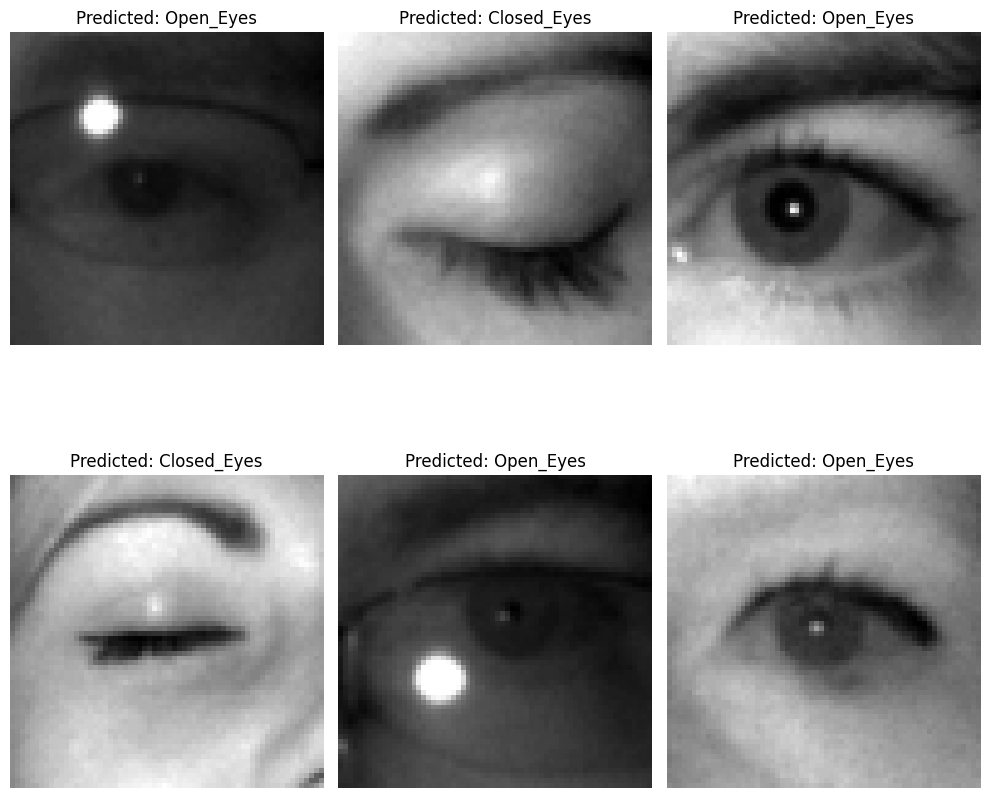

In [11]:
import matplotlib.pyplot as plt
import random

# Predict labels for test images
preds = best_classifier.predict(x_test_pca)
preds = (preds >= 0.5).astype(np.int32)

# Select 6 random indices from the test data
random_indices = random.sample(range(len(x_test)), 6)  # Select exactly 6 random images

# Create a subplot grid to display images
plt.figure(figsize=(10, 10))

# Display the selected random test images with predictions
for i, idx in enumerate(random_indices):
    img = x_test[idx]
    pred = preds[idx]
    label = 'Open_Eyes' if pred == 1 else 'Closed_Eyes'
    
    plt.subplot(2, 3, i + 1)  # Create a 2x3 grid for 6 images
    plt.imshow(img.squeeze(), cmap='gray')  # Show the image
    plt.title(f'Predicted: {label}')  # Title with prediction label
    plt.axis('off')  # Turn off the axis for better visibility

plt.tight_layout()  # Adjust the layout so that images don't overlap
plt.show()
